In [25]:
import pandas as pd 
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [24]:
df = pd.read_csv('C:\\Users\\britt\\Downloads\\purchase dataset.csv')
print(df)

       User ID   Age  Gender  ... Purchase Amount  Purchase Date Product Category
0            1  56.0  Female  ...          331.79     2021-11-21           Sports
1            2  69.0    Male  ...          335.72     2022-03-05   Home & Kitchen
2            3  46.0     NaN  ...          493.18            NaN            Books
3            4  32.0    Male  ...           80.97     2023-06-08           Sports
4            5  60.0  Female  ...           21.75            NaN           Beauty
...        ...   ...     ...  ...             ...            ...              ...
14995    14996  21.0    Male  ...          427.07     2023-08-20         Clothing
14996    14997  53.0   Other  ...           27.73     2021-07-23   Home & Kitchen
14997    14998  65.0  Female  ...          108.57     2022-02-21           Beauty
14998    14999  34.0   Other  ...          105.57     2022-08-25            Books
14999    15000   NaN   Other  ...          415.07     2020-05-28           Sports

[15000 rows x 7

In [22]:
df.columns

Index(['User ID', 'Age', 'Gender', 'Country', 'Purchase Amount',
       'Purchase Date', 'Product Category', 'Will Purchase', 'Purchase Month'],
      dtype='object')

In [23]:
# Corrected code:
x = df.drop('Gender', axis=1)  # Fixed: Changed brackets [] to parentheses () and corrected syntax
y = df['Product Category'] #target Variable

# In the second instance (Cell In[13]):
X = df.drop('Gender', axis=1)  # Fixed: Changed brackets [] to parentheses () and corrected syntax

Model Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00       128

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Feature Importance:
            Feature  Importance
3   Purchase Amount         1.0
0               Age         0.0
1            Gender         0.0
2           Country         0.0
4  Product Category         0.0
5    Purchase Month         0.0

New Customer Purchase Prediction:
Will Purchase: Yes
Probability: 1.00


i:\Python\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
i:\Python\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


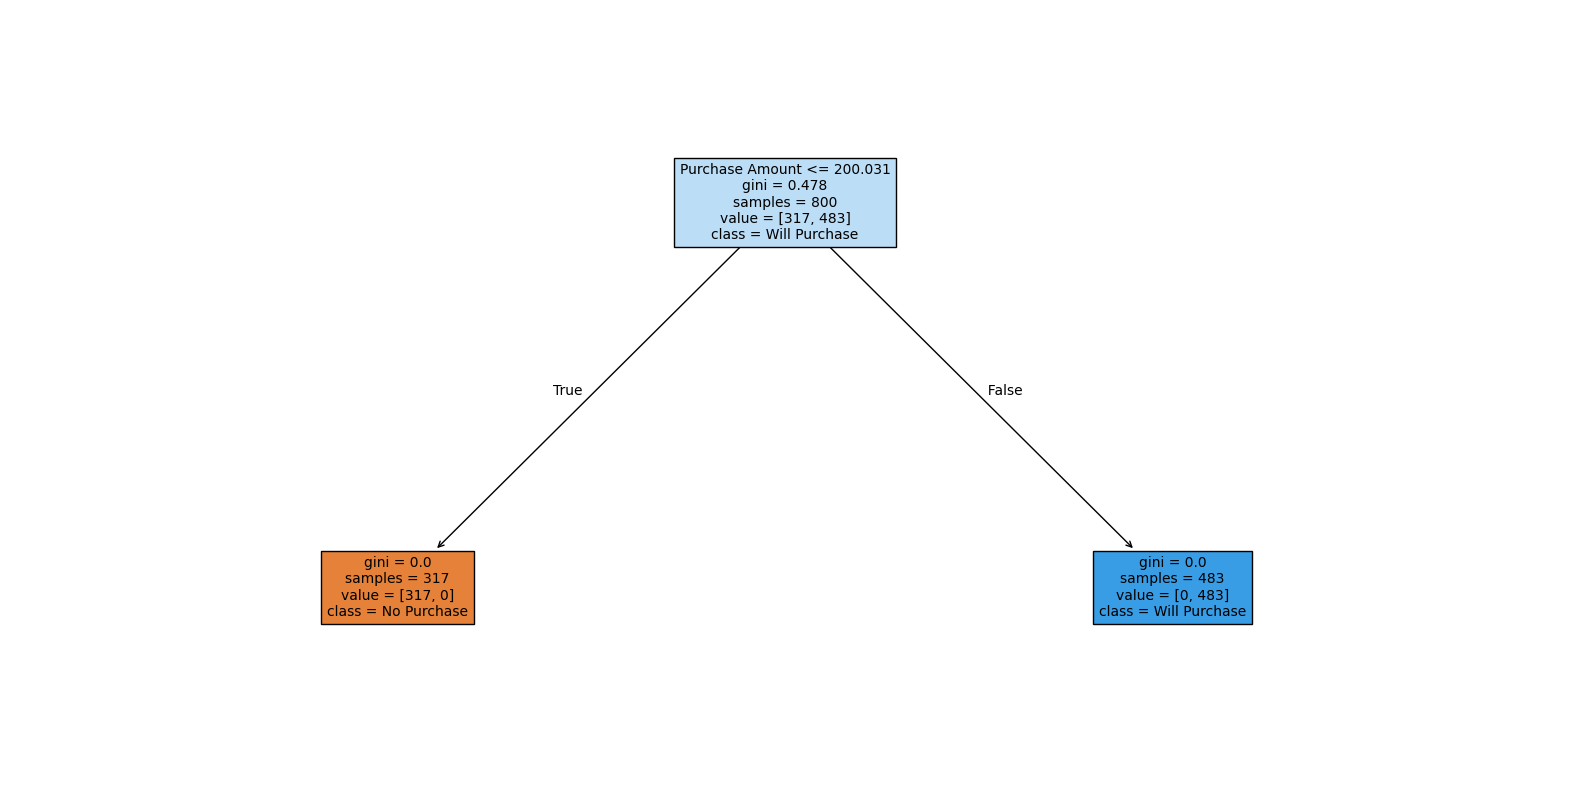

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

# Assuming you have a DataFrame df with the columns as shown in the index
# If not, you would load your data like this:
# df = pd.read_csv('your_data.csv')

# For demonstration, let's create a sample dataset
np.random.seed(42)
n_samples = 1000

# Generate sample data
user_ids = [f'U{i}' for i in range(1, n_samples+1)]
ages = np.random.randint(18, 70, n_samples)
genders = np.random.choice(['M', 'F'], n_samples)
countries = np.random.choice(['USA', 'UK', 'Canada', 'Australia', 'Germany'], n_samples)
purchase_amounts = np.random.uniform(10, 500, n_samples)
purchase_dates = pd.date_range(start='2023-01-01', periods=n_samples).strftime('%Y-%m-%d')
product_categories = np.random.choice(['Electronics', 'Clothing', 'Books', 'Home', 'Beauty'], n_samples)

# Create DataFrame
df = pd.DataFrame({
    'User ID': user_ids,
    'Age': ages,
    'Gender': genders,
    'Country': countries,
    'Purchase Amount': purchase_amounts,
    'Purchase Date': purchase_dates,
    'Product Category': product_categories
})

# Create a target variable based on some criteria
# For example, if purchase amount > 200, we'll consider it a "high value" purchase (1), otherwise (0)
df['Will Purchase'] = (df['Purchase Amount'] > 200).astype(int)

# Preprocess the data
# Convert categorical variables to numerical using LabelEncoder
label_encoders = {}
categorical_cols = ['Gender', 'Country', 'Product Category']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Extract month from purchase date as a feature
df['Purchase Month'] = pd.to_datetime(df['Purchase Date']).dt.month

# Select features and target
X = df.drop(['User ID', 'Purchase Date', 'Will Purchase'], axis=1)
y = df['Will Purchase']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=['No Purchase', 'Will Purchase'], 
               filled=True, fontsize=10)
plt.savefig('decision_tree.png', dpi=300, bbox_inches='tight')

# Function to predict for new customers
def predict_purchase(age, gender, country, purchase_amount, product_category, purchase_month):
    # Encode categorical variables
    gender_encoded = label_encoders['Gender'].transform([gender])[0]
    country_encoded = label_encoders['Country'].transform([country])[0]
    product_category_encoded = label_encoders['Product Category'].transform([product_category])[0]
    
    # Create features array
    features = np.array([[age, gender_encoded, country_encoded, purchase_amount, 
                          product_category_encoded, purchase_month]])
    
    # Make prediction
    prediction = dt_model.predict(features)[0]
    probability = dt_model.predict_proba(features)[0][1]
    
    return prediction, probability

# Example usage
new_customer = {
    'age': 35,
    'gender': 'M',
    'country': 'USA',
    'purchase_amount': 250,
    'product_category': 'Electronics',
    'purchase_month': 3
}

prediction, probability = predict_purchase(
    new_customer['age'],
    new_customer['gender'],
    new_customer['country'],
    new_customer['purchase_amount'],
    new_customer['product_category'],
    new_customer['purchase_month']
)

print("\nNew Customer Purchase Prediction:")
print(f"Will Purchase: {'Yes' if prediction == 1 else 'No'}")
print(f"Probability: {probability:.2f}")
